## Taller 3: Exploratory Data Analysis (EDA)

Daniel Alberto González Pabón -- CC 1128462077  

## Taller 3: Análsis exploratorio de datos

Tomado de: https://www.kaggle.com/datasets/khushikyad001/electric-vehicle-analytics-dataset?select=electric_vehicle_analytics.csv

This dataset named "Electric Vehicle Analytics Dataset" provides a comprehensive view of electric vehicle (EV) performance, charging behavior, battery health, and cost analytics across different manufacturers, models, regions, and usage types. We will be performing a exploratory data analysis in order to understand some of the insights of the electric vehicle market. 

### Objetivo del estudio

- Comprender el comportamiento y la dinámica del mercado de los vehículos eléctricos 
    - Identificar el comportamiento de las diferentes variables según la caracteristicas de los vehículos
    - Encontrar relaciones entre variables continua en clave del tipo de vehículo (segmento) y el uso del vehiculo.  
    - Realizar una caracterización por segmento, teniendo en cuenta la relación calidad - precio (costo y mantenimiento)

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### 0) Entendimiento de la información y limpieza

In [200]:
datacsv = pd.read_csv(r"C:\Users\DanielGP\OneDrive - Caja de Compensacion Familiar de Antioquia COMFAMA\Tendencias\Personal\Especialización\Materias\Fundamentos de programación\electric_vehicle_analytics.csv")

datacsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Vehicle_ID                        3000 non-null   int64  
 1   Make                              3000 non-null   object 
 2   Model                             3000 non-null   object 
 3   Year                              3000 non-null   int64  
 4   Region                            3000 non-null   object 
 5   Vehicle_Type                      3000 non-null   object 
 6   Battery_Capacity_kWh              3000 non-null   float64
 7   Battery_Health_%                  3000 non-null   float64
 8   Range_km                          3000 non-null   int64  
 9   Charging_Power_kW                 3000 non-null   float64
 10  Charging_Time_hr                  3000 non-null   float64
 11  Charge_Cycles                     3000 non-null   int64  
 12  Energy

In [201]:
datacsv.to_csv("electric_vehicle_analytics.csv", index=False)

In [202]:
datacsv.head()

,Vehicle_ID,Make,Model,Year,Region,Vehicle_Type,Battery_Capacity_kWh,Battery_Health_%,Range_km,Charging_Power_kW,...,Max_Speed_kmh,Acceleration_0_100_kmh_sec,Temperature_C,Usage_Type,CO2_Saved_tons,Maintenance_Cost_USD,Insurance_Cost_USD,Electricity_Cost_USD_per_kWh,Monthly_Charging_Cost_USD,Resale_Value_USD
0,1,Nissan,Leaf,2021,Asia,SUV,101.7,75.5,565,153.6,...,233,8.1,-9.0,Personal,14.1,969,843,0.3,375.6,26483
1,2,Nissan,Leaf,2020,Australia,Sedan,30.1,99.8,157,157.2,...,221,9.8,1.6,Personal,19.4,1157,1186,0.2,532.0,11287
2,3,Hyundai,Kona Electric,2021,North America,SUV,118.5,84.0,677,173.6,...,138,3.6,1.5,Fleet,29.4,291,1890,0.3,1291.7,34023
3,4,Audi,Q4 e-tron,2022,Europe,Hatchback,33.1,97.3,149,169.3,...,192,9.0,12.5,Fleet,7.0,401,2481,0.3,234.4,14398
4,5,Tesla,Model 3,2022,Australia,Truck,81.3,85.6,481,212.8,...,189,7.0,-3.0,Commercial,2.1,214,2336,0.1,32.6,23033


In [203]:
datacsv.isna().sum()

Vehicle_ID                          0
Make                                0
Model                               0
Year                                0
Region                              0
Vehicle_Type                        0
Battery_Capacity_kWh                0
Battery_Health_%                    0
Range_km                            0
Charging_Power_kW                   0
Charging_Time_hr                    0
Charge_Cycles                       0
Energy_Consumption_kWh_per_100km    0
Mileage_km                          0
Avg_Speed_kmh                       0
Max_Speed_kmh                       0
Acceleration_0_100_kmh_sec          0
Temperature_C                       0
Usage_Type                          0
CO2_Saved_tons                      0
Maintenance_Cost_USD                0
Insurance_Cost_USD                  0
Electricity_Cost_USD_per_kWh        0
Monthly_Charging_Cost_USD           0
Resale_Value_USD                    0
dtype: int64

### 1) Estadisticas descriptivas

In [204]:
pd.options.display.float_format = "{:.1f}".format
datacsv.describe().T.sort_values(by="mean", ascending=False)

,count,mean,std,min,25%,50%,75%,max
Mileage_km,3000.0,125209.7,70465.8,5046.0,65140.5,125965.0,184764.8,249987.0
Resale_Value_USD,3000.0,22257.0,5595.0,8506.0,17813.0,22154.0,26732.8,35521.0
Year,3000.0,2019.5,2.8,2015.0,2017.0,2020.0,2022.0,2024.0
Vehicle_ID,3000.0,1500.5,866.2,1.0,750.8,1500.5,2250.2,3000.0
Insurance_Cost_USD,3000.0,1495.5,585.9,500.0,984.8,1496.0,2019.2,2498.0
Charge_Cycles,3000.0,1107.0,510.8,200.0,674.8,1116.0,1535.2,1997.0
Maintenance_Cost_USD,3000.0,1104.2,521.5,200.0,652.0,1109.0,1569.0,1999.0
Monthly_Charging_Cost_USD,3000.0,418.8,312.4,8.0,175.5,347.3,595.2,1643.7
Range_km,3000.0,374.4,137.2,121.0,260.0,371.0,476.2,713.0
Max_Speed_kmh,3000.0,190.7,35.2,130.0,159.0,191.5,222.0,249.0


In [231]:
df_Expensive_Maintenance = datacsv[datacsv["Maintenance_Cost_USD"] > 1104.2]
df_Cheap_Maintenance = datacsv[datacsv["Maintenance_Cost_USD"] < 1104.2]

datacsv["Cheap_Maintenance"] = datacsv["Maintenance_Cost_USD"].apply(lambda x: 1 if x < 1104.2 else 0)
df_Cheap_Maintenance.describe()

,Vehicle_ID,Year,Battery_Capacity_kWh,Battery_Health_%,Range_km,Charging_Power_kW,Charging_Time_hr,Charge_Cycles,Energy_Consumption_kWh_per_100km,Mileage_km,...,Max_Speed_kmh,Acceleration_0_100_kmh_sec,Temperature_C,CO2_Saved_tons,Maintenance_Cost_USD,Insurance_Cost_USD,Electricity_Cost_USD_per_kWh,Monthly_Charging_Cost_USD,Resale_Value_USD,Cheap_Maintenance
count,1494.0,1494.0,1494.0,1494.0,1494.0,1494.0,1494.0,1494.0,1494.0,1494.0,...,1494.0,1494.0,1494.0,1494.0,1494.0,1494.0,1494.0,1494.0,1494.0,1494.0
mean,1514.2,2019.5,74.5,85.3,371.9,128.9,1.2,1100.1,18.6,125611.1,...,189.2,6.7,14.7,15.1,649.0,1519.8,0.2,423.8,22157.6,1.0
std,867.1,2.8,26.1,8.5,137.8,68.4,1.4,515.2,3.7,70336.6,...,35.1,1.9,14.2,8.4,258.3,578.8,0.1,313.0,5659.1,0.0
min,1.0,2015.0,30.0,70.0,127.0,11.2,0.2,200.0,12.0,5060.0,...,130.0,3.5,-10.0,0.6,200.0,500.0,0.1,8.0,8958.0,1.0
25%,761.2,2017.0,52.3,78.2,257.0,70.7,0.5,653.2,15.4,65735.0,...,158.0,5.0,2.3,7.9,425.0,1021.2,0.1,177.5,17472.0,1.0
50%,1526.5,2020.0,74.5,85.7,367.0,125.0,0.7,1116.0,18.7,125225.0,...,189.0,6.6,14.6,15.0,650.0,1528.0,0.2,352.7,21999.0,1.0
75%,2275.8,2022.0,96.7,92.3,478.0,186.6,1.3,1536.8,21.8,186734.0,...,219.0,8.3,27.1,22.4,874.0,2032.8,0.3,602.0,26742.0,1.0
max,3000.0,2024.0,120.0,100.0,713.0,250.0,12.1,1997.0,25.0,249744.0,...,249.0,10.0,40.0,30.0,1103.0,2495.0,0.3,1625.4,35505.0,1.0


In [232]:
datacsv["Expensive_Maintenance"] = datacsv["Maintenance_Cost_USD"].apply(lambda x: 1 if x > 1104.2 else 0)
df_Expensive_Maintenance.describe()

,Vehicle_ID,Year,Battery_Capacity_kWh,Battery_Health_%,Range_km,Charging_Power_kW,Charging_Time_hr,Charge_Cycles,Energy_Consumption_kWh_per_100km,Mileage_km,...,Max_Speed_kmh,Acceleration_0_100_kmh_sec,Temperature_C,CO2_Saved_tons,Maintenance_Cost_USD,Insurance_Cost_USD,Electricity_Cost_USD_per_kWh,Monthly_Charging_Cost_USD,Resale_Value_USD,Cheap_Maintenance
count,1506.0,1506.0,1506.0,1506.0,1506.0,1506.0,1506.0,1506.0,1506.0,1506.0,...,1506.0,1506.0,1506.0,1506.0,1506.0,1506.0,1506.0,1506.0,1506.0,1506.0
mean,1486.9,2019.5,75.2,84.8,376.9,129.7,1.2,1113.9,18.6,124811.4,...,192.2,6.8,14.9,15.0,1555.7,1471.3,0.2,413.8,22355.7,0.0
std,865.3,2.9,25.4,8.7,136.6,69.1,1.5,506.6,3.8,70614.8,...,35.2,1.9,14.6,8.5,257.2,592.1,0.1,311.8,5530.8,0.0
min,2.0,2015.0,30.0,70.0,121.0,11.1,0.1,201.0,12.0,5046.0,...,130.0,3.5,-10.0,0.6,1105.0,500.0,0.1,10.1,8506.0,0.0
25%,742.2,2017.0,54.0,77.4,264.0,72.0,0.5,697.0,15.2,64602.5,...,162.0,5.1,2.5,7.8,1331.5,941.2,0.1,170.8,18216.8,0.0
50%,1480.0,2019.0,75.1,84.9,375.0,128.0,0.7,1116.5,18.7,126558.0,...,194.0,6.8,14.6,15.2,1567.0,1465.0,0.2,340.4,22245.0,0.0
75%,2235.5,2022.0,96.9,92.3,476.0,189.7,1.3,1534.0,21.9,182689.8,...,223.0,8.3,28.3,21.9,1774.0,2004.8,0.3,588.8,26715.5,0.0
max,2999.0,2024.0,119.8,100.0,712.0,249.6,12.0,1997.0,25.0,249987.0,...,249.0,10.0,40.0,30.0,1999.0,2498.0,0.3,1643.7,35521.0,0.0


### 2) Análisis univariado

In [205]:
df = datacsv.drop(columns = ["Vehicle_ID"])  

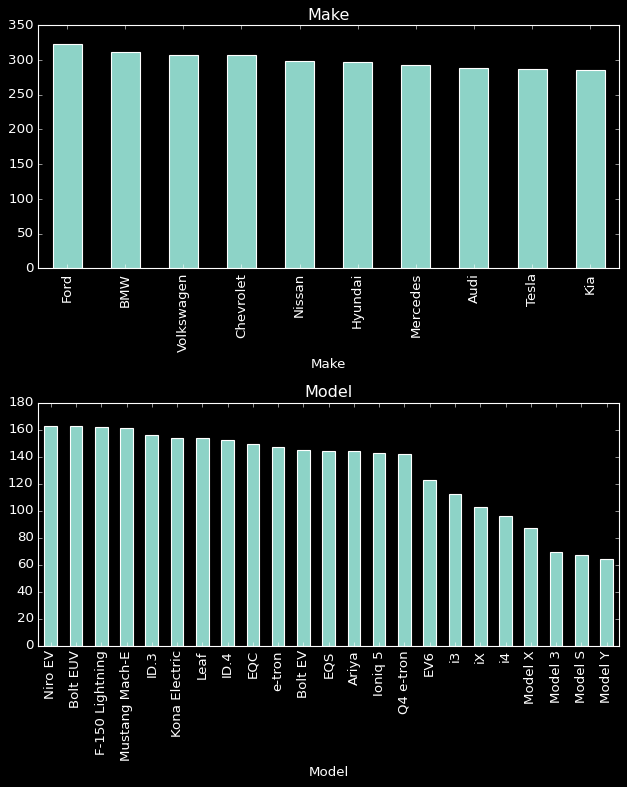

In [206]:
#Analisis de variables tipocategoricas

plt.style.use('dark_background')

categorical_cols = datacsv.select_dtypes(include=['object']).columns

categorical_cols = categorical_cols.drop(["Vehicle_ID", "Region", "Vehicle_Type", "Usage_Type"], errors='ignore')

n = len(categorical_cols)
nrows, ncols = (2,1)


fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 10))
for idx, column in enumerate(categorical_cols):
    ax = axs.flatten()[idx]
    counts = datacsv[column].value_counts()
    bars = counts.plot(kind='bar', ax=ax, title=column)
    
    
for i in range(len(categorical_cols), len(axs.flatten())):
    axs.flatten()[i].set_visible(False)
    
plt.tight_layout()
plt.show()


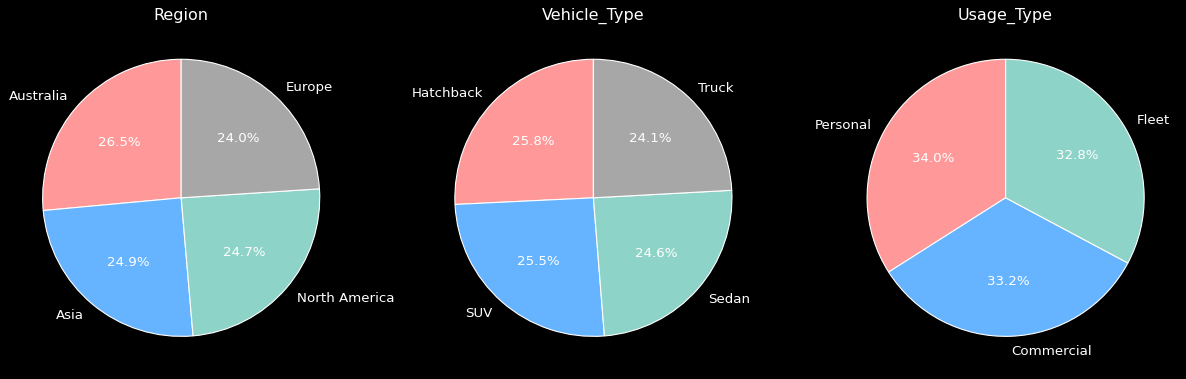

In [207]:
plt.style.use('dark_background')

cols = ["Region", "Vehicle_Type", "Usage_Type"]
colors = ['#ff9999','#66b3ff','#8DD3C7','#a7a7a7']
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for idx, column in enumerate(cols): 
    counts = datacsv[column].value_counts()
    
    axs[idx].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
    axs[idx].set_title(column)
    
    plt.tight_layout()
plt.show()


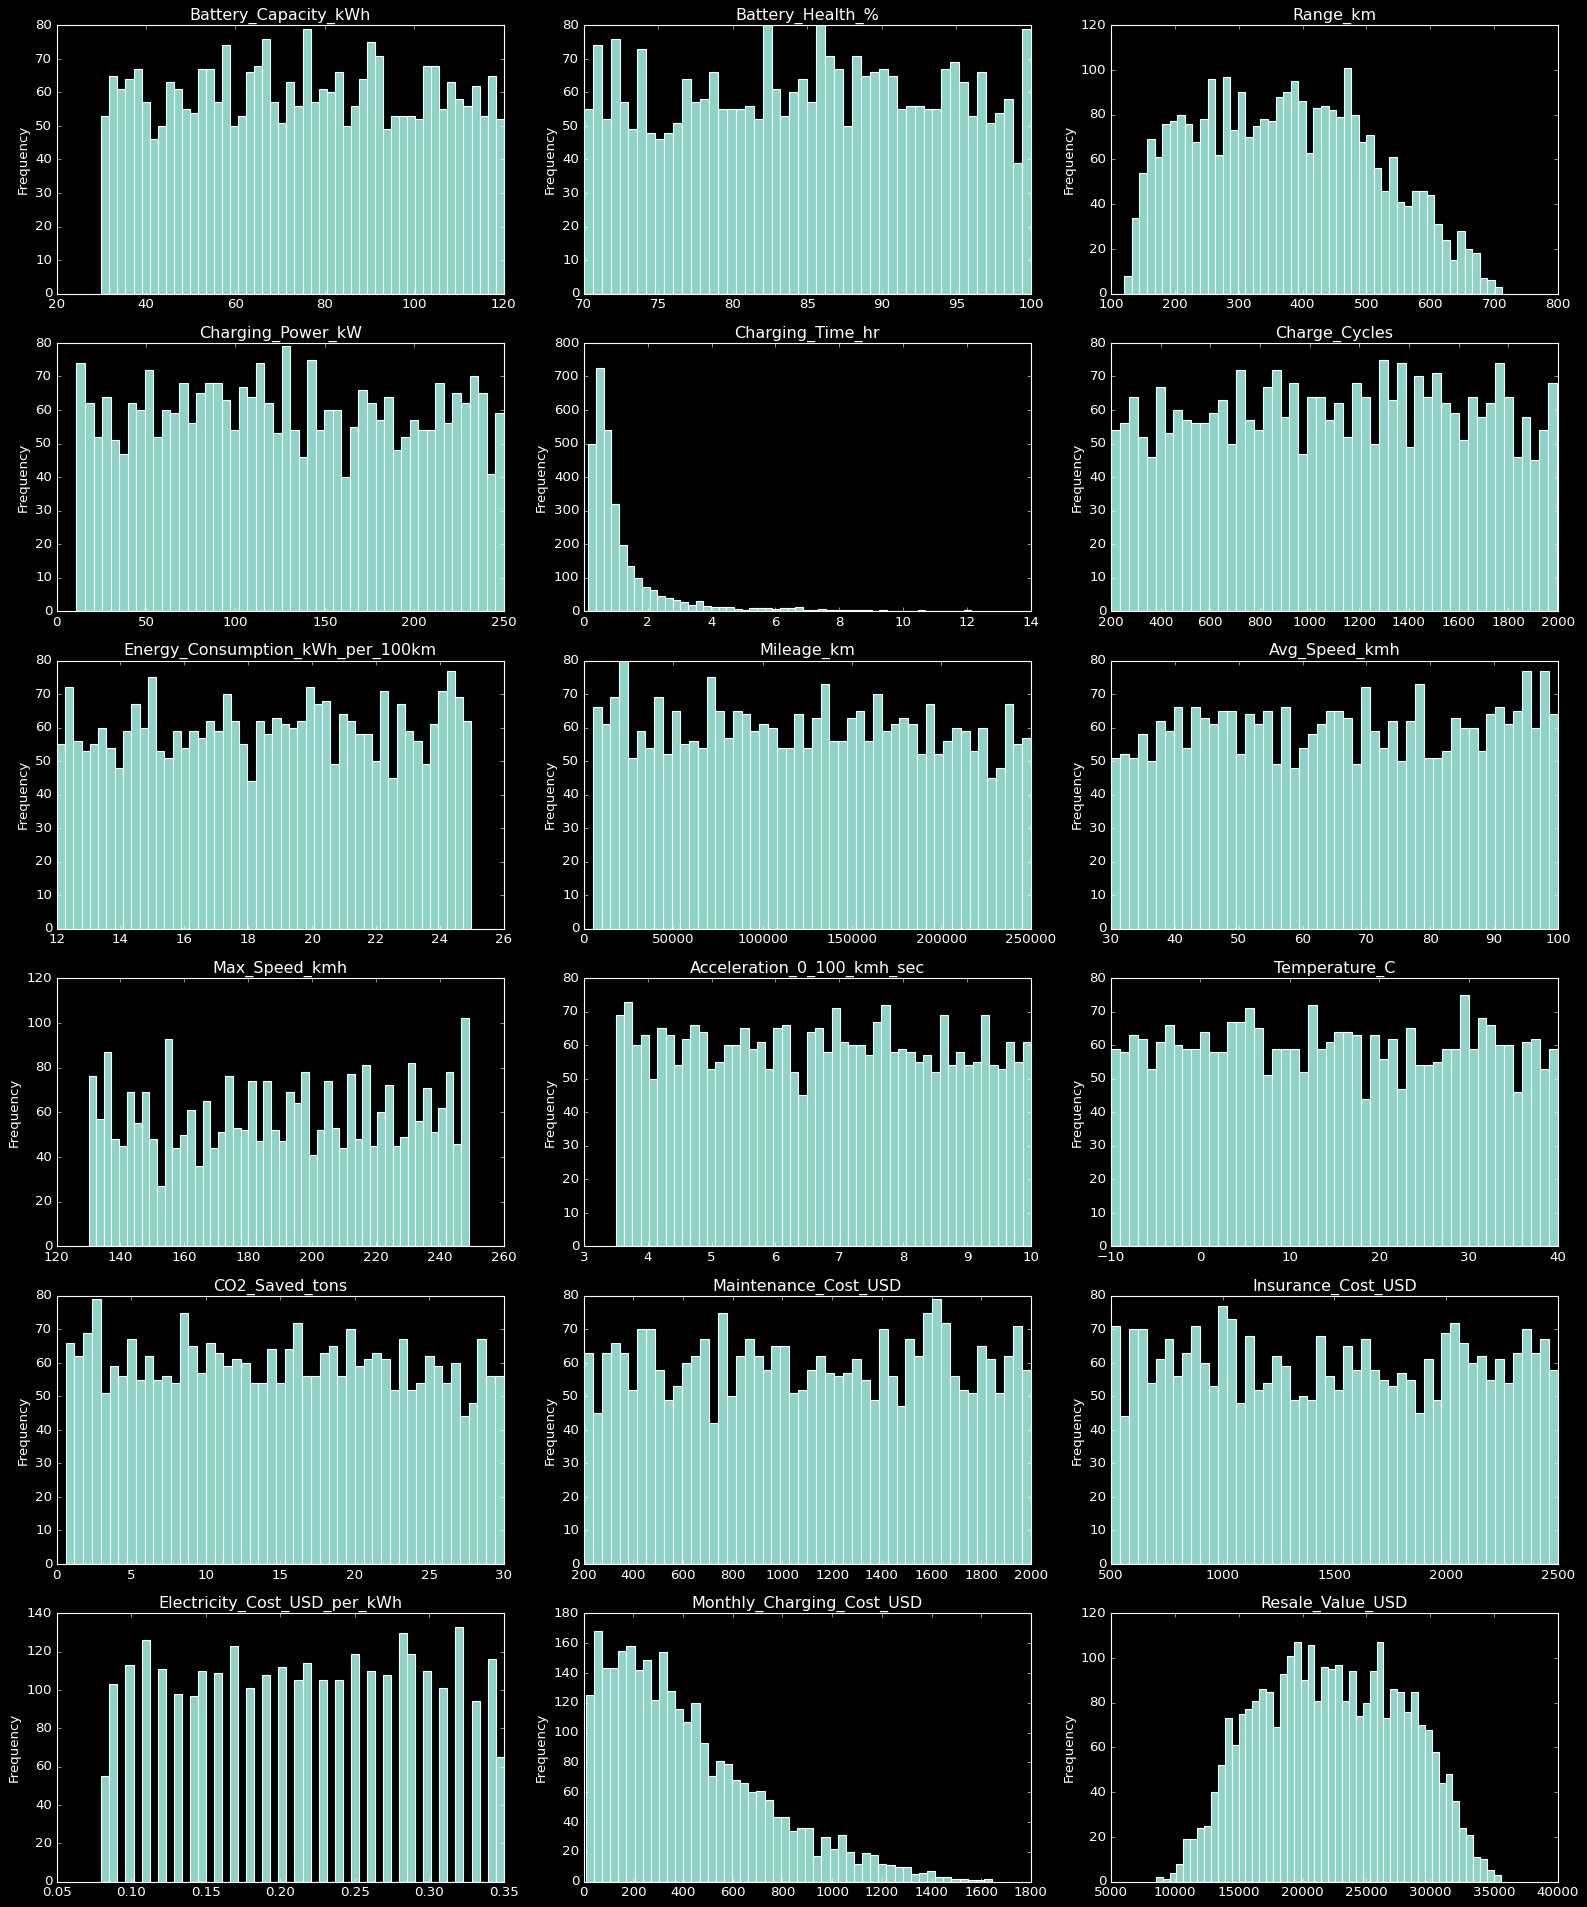

In [208]:
# Ánalisis de variables numéricas

plt.style.use('dark_background')

num_cols = datacsv.select_dtypes(include=['int64', 'float64']).columns

num_cols = num_cols.drop(['Vehicle_ID',"Year"], errors= "ignore")

n = len(num_cols)
nrows, ncols = (6, 3)
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 24))

for idx, column in enumerate(num_cols):
    ax = axs.flatten()[idx]
    datacsv[column].plot(kind='hist', ax=ax, title=column, bins=50)

for i in range(len(num_cols), len(axs.flatten())):
    axs.flatten()[i].set_visible(False)

plt.tight_layout()
plt.show()

### 3) Relación entre dos variables

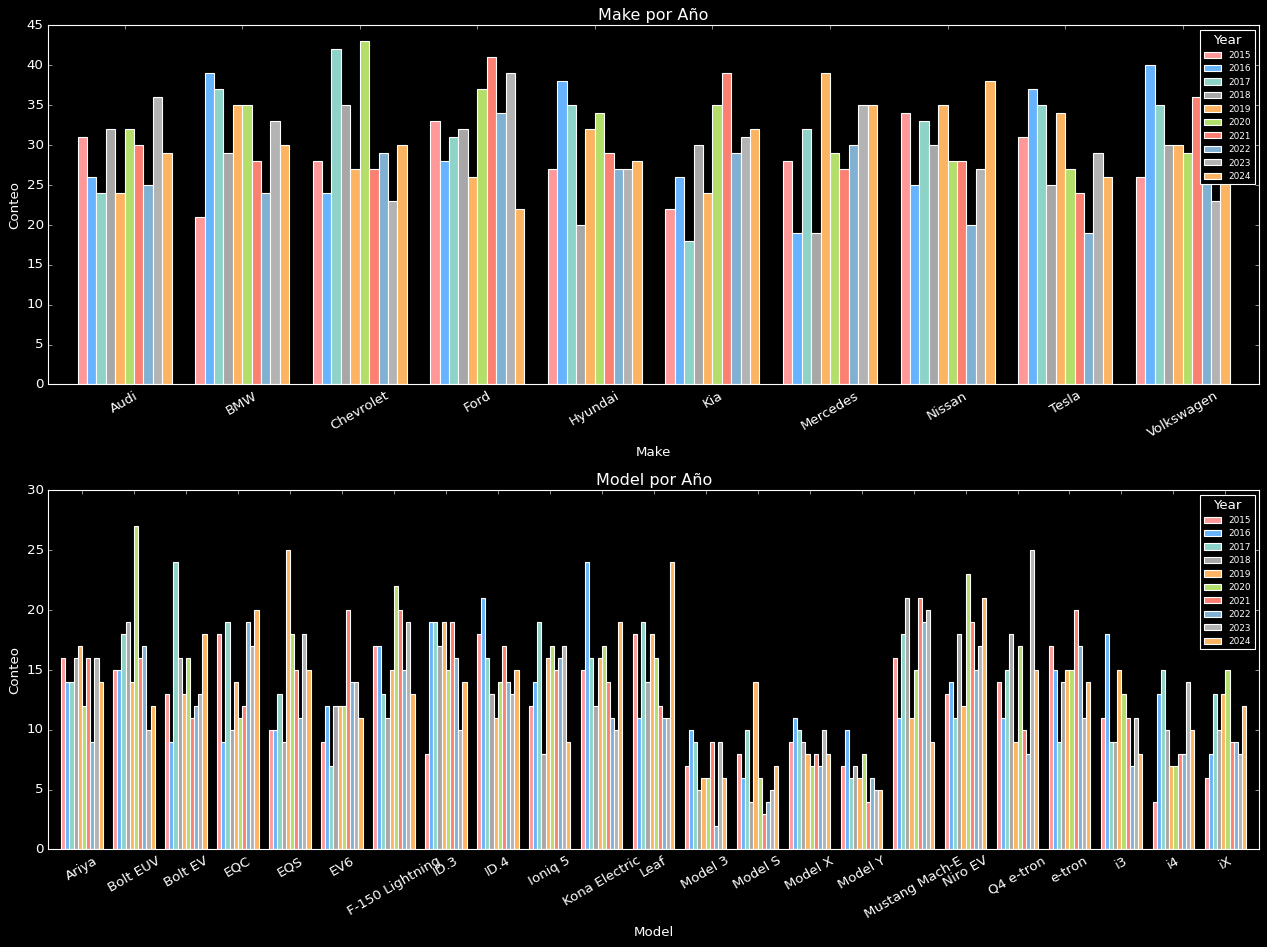

In [209]:
plt.style.use('dark_background')

cols = ["Make", "Model"]
colors = ['#ff9999', '#66b3ff', '#8DD3C7', '#a7a7a7', '#FDB462', '#B3DE69', '#FB8072', '#80B1D3', '#B3B3B3', '#FDB462'] 

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))

for idx, column in enumerate(cols):
    ax = axs[idx]

    pivot = (
        datacsv.groupby([column, "Year"])
               .size()
               .unstack(fill_value=0)
    )

    pivot.plot(kind="bar", ax=ax, color=colors[:len(pivot.columns)], width=0.8)

    ax.set_title(f"{column} por Año")
    ax.set_xlabel(column)
    ax.set_ylabel("Conteo")
    ax.legend(title="Year", fontsize=8)
    ax.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

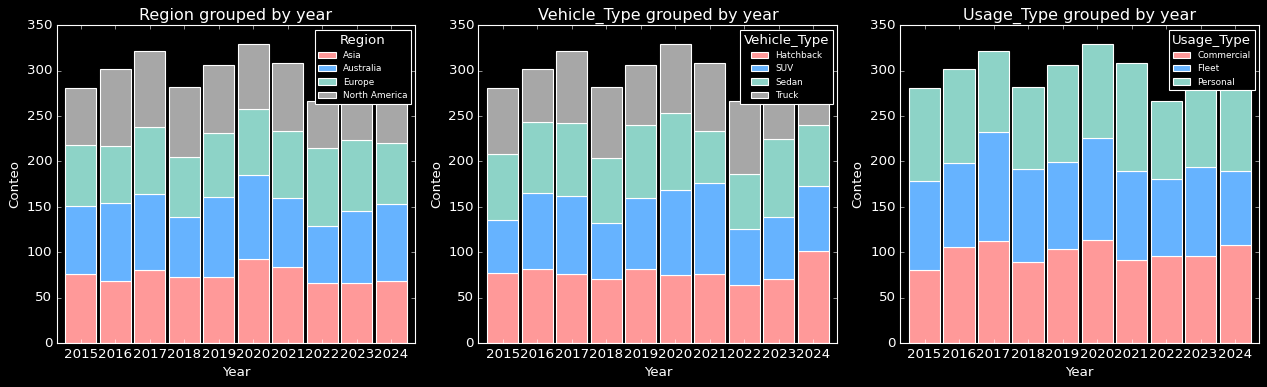

In [210]:
plt.style.use('dark_background')

cols = ["Region", "Vehicle_Type", "Usage_Type"]
colors = ['#ff9999', '#66b3ff', '#8DD3C7', '#a7a7a7', '#FDB462', '#B3DE69'] 


fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

for idx, column in enumerate(cols):
    ax = axs[idx]

    pivot = (
        datacsv.groupby("Year")[column]
               .value_counts()
               .unstack(fill_value=0)
               .sort_index()
    )

    pivot.plot(kind="bar", ax=ax, stacked=True,
               color=colors[:len(pivot.columns)], width=0.9)

    ax.set_title(f"{column} grouped by year")
    ax.set_xlabel("Year")
    ax.set_ylabel("Conteo")
    ax.legend(title=column, fontsize=8)
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [211]:
df_Personal = df[df["Usage_Type"] == "Personal"]
df_Fleet = df[df["Usage_Type"] == "Fleet"]
df_Commercial = df[df["Usage_Type"] == "Commercial"]    


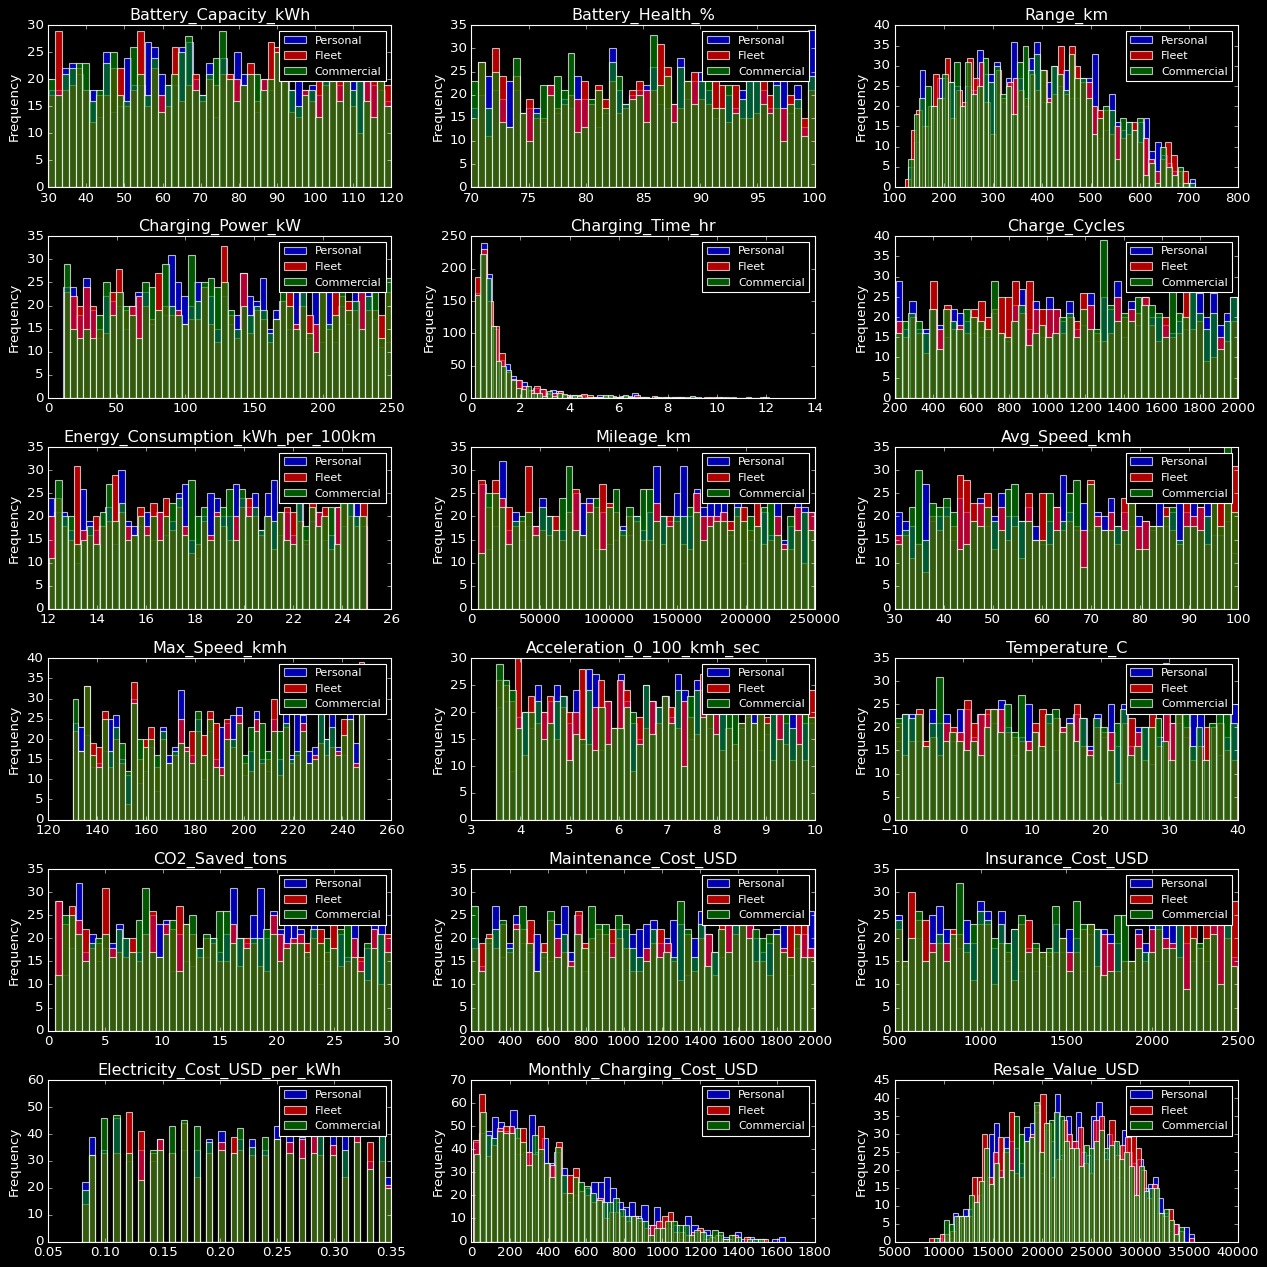

In [212]:
plt.style.use('dark_background')

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop(["Year"], errors= "ignore")

fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(14, 18))

for idx, column in enumerate(num_cols):
    ax = axs.flatten()[idx]
    df_Personal[column].plot(kind='hist', ax=ax, alpha=0.7, color='blue', label='Personal', bins=50)
    df_Fleet[column].plot(kind='hist', ax=ax, alpha=0.7, color='red', label='Fleet', bins=50)
    df_Commercial[column].plot(kind='hist', ax=ax, alpha=0.7, color='green', label='Commercial', bins=50)
    ax.set_title(column)
    ax.legend(fontsize='small')

fig.set_figwidth(16)
fig.set_figheight(16)
plt.tight_layout()
plt.show()


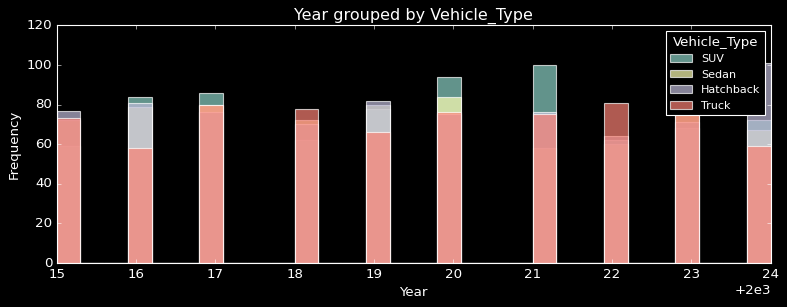

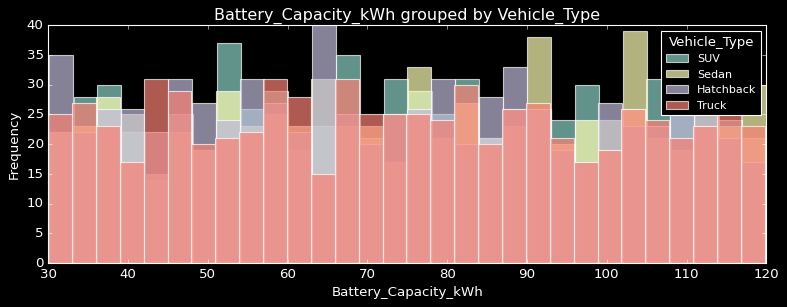

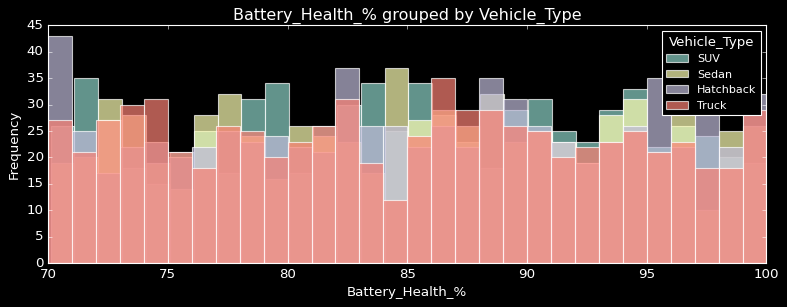

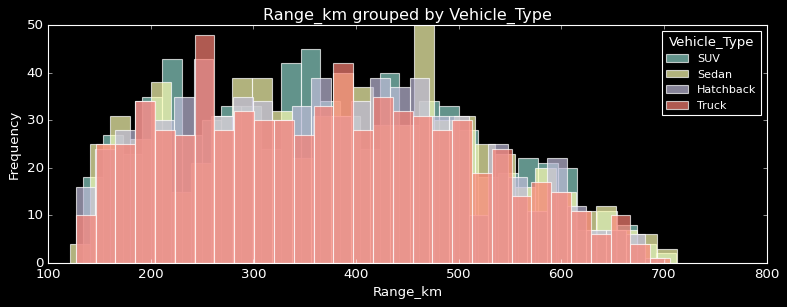

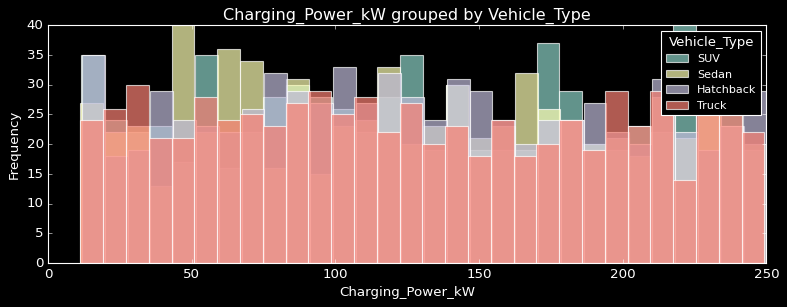

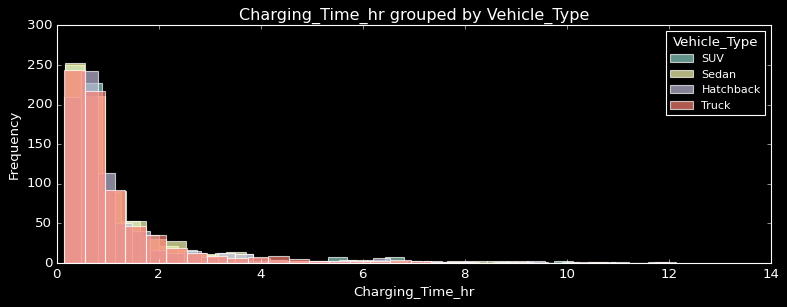

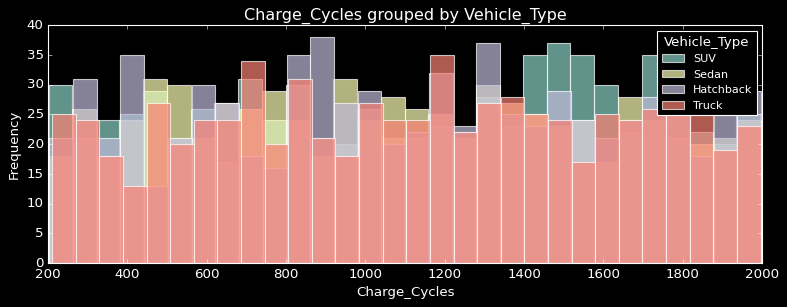

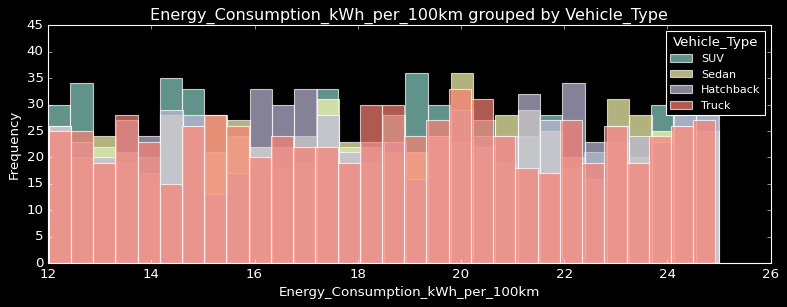

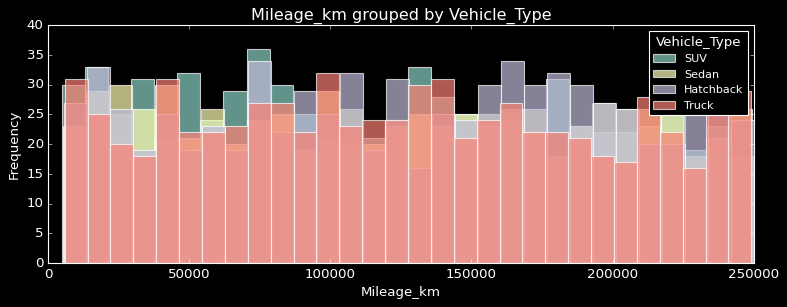

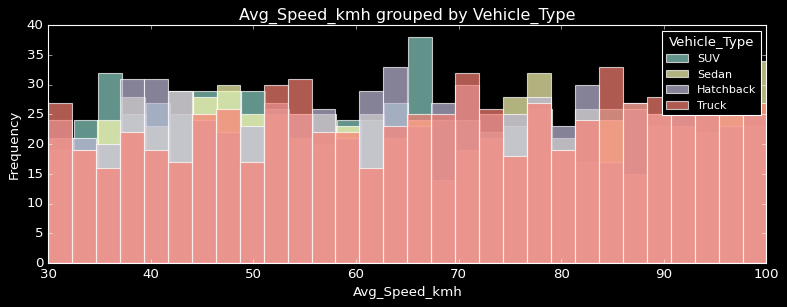

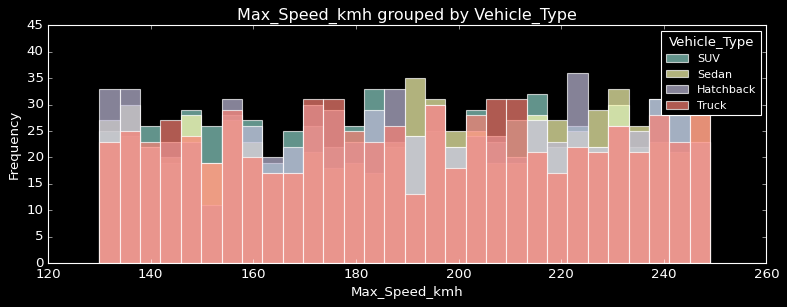

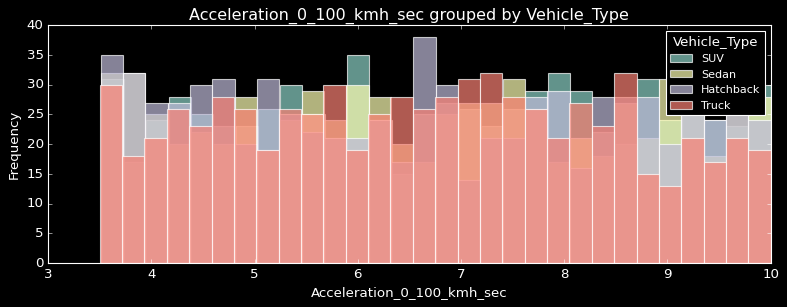

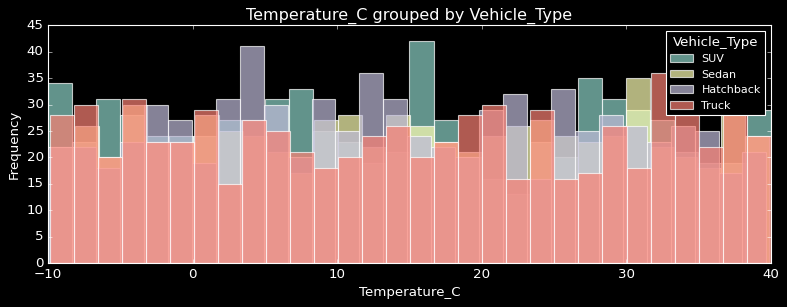

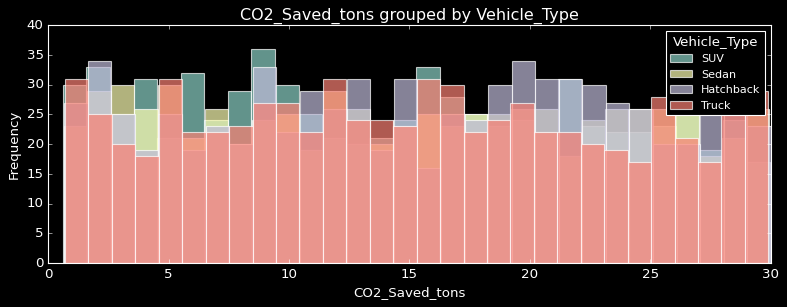

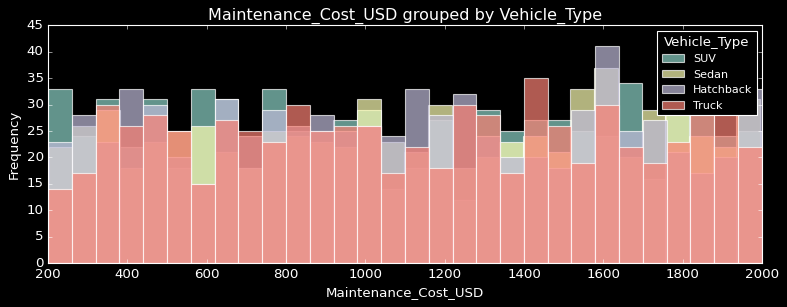

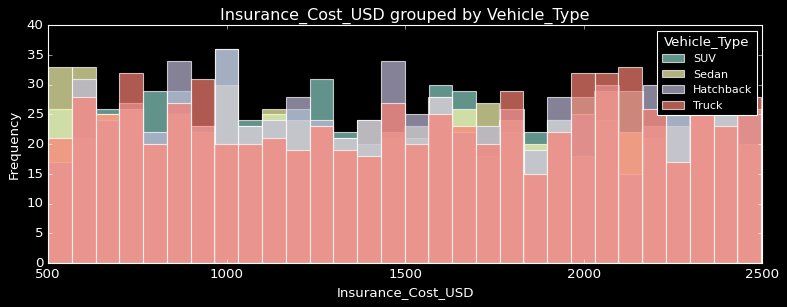

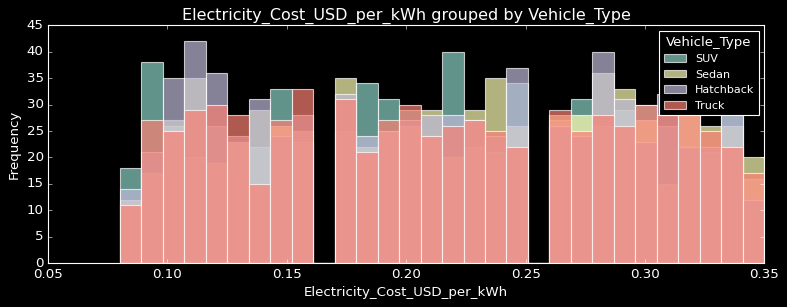

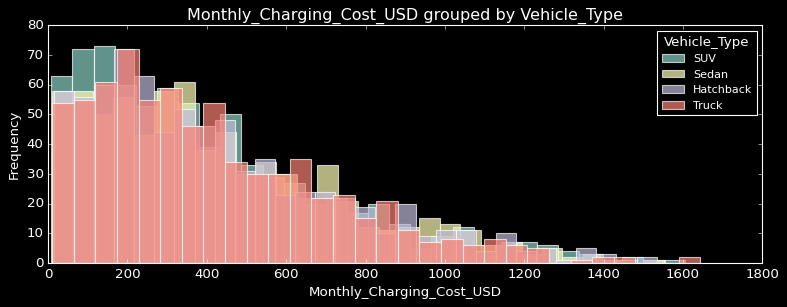

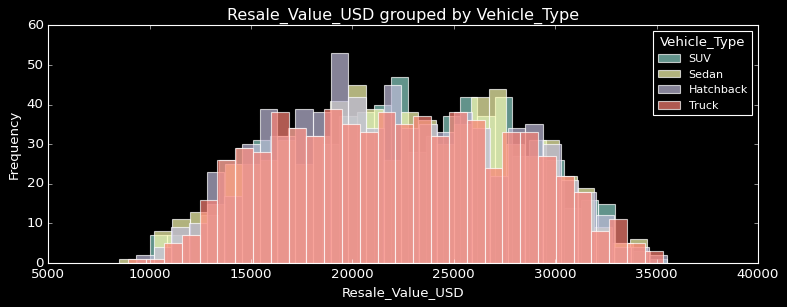

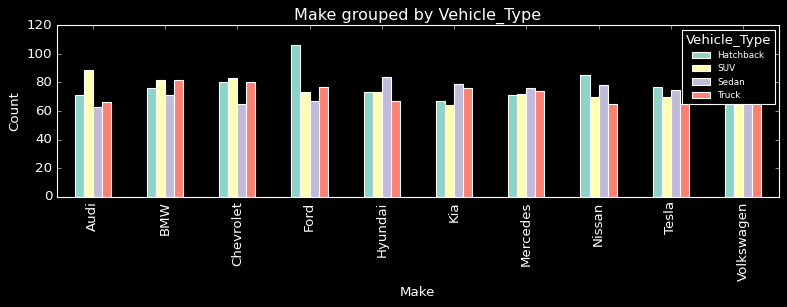

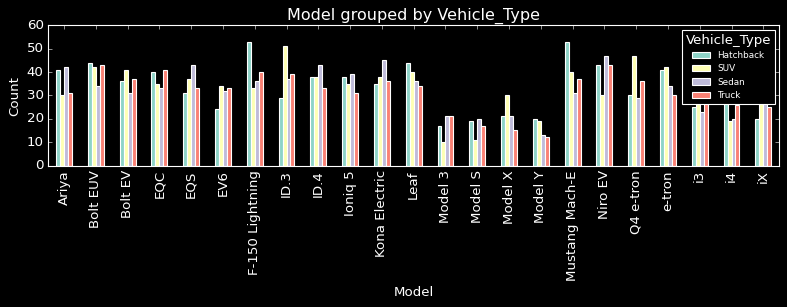

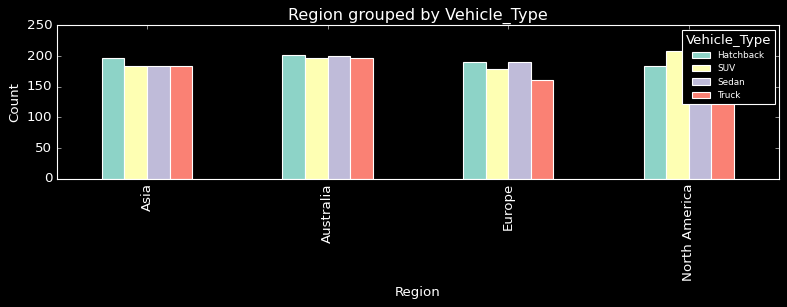

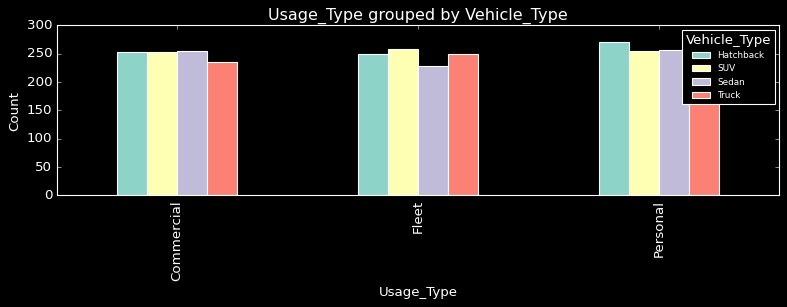

In [213]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
obj_cols = df.select_dtypes(include='object').columns.drop("Vehicle_Type", errors="ignore")
unique_vals = df["Vehicle_Type"].dropna().unique()

for cont_col in num_cols:
    plt.figure(figsize=(10, 4))
    for val in unique_vals:
        group = df[df["Vehicle_Type"] == val]
        group[cont_col].plot(kind='hist', bins=30, alpha=0.7, label=str(val))
    
    plt.title(f"{cont_col} grouped by Vehicle_Type")
    plt.xlabel(cont_col)
    plt.ylabel("Frequency")
    plt.legend(title="Vehicle_Type", fontsize="small")
    plt.tight_layout()
    plt.show()
    
for cat_col in obj_cols:
    plt.figure(figsize=(10, 4))
    cross = df.groupby([cat_col, "Vehicle_Type"]).size().unstack(fill_value=0)
    cross.plot(kind="bar", ax=plt.gca())
    
    plt.title(f"{cat_col} grouped by Vehicle_Type")
    plt.xlabel(cat_col)
    plt.ylabel("Count")
    plt.legend(title="Vehicle_Type", fontsize=8)
    plt.tight_layout()
    plt.show()

### 4) Análisis multivariado

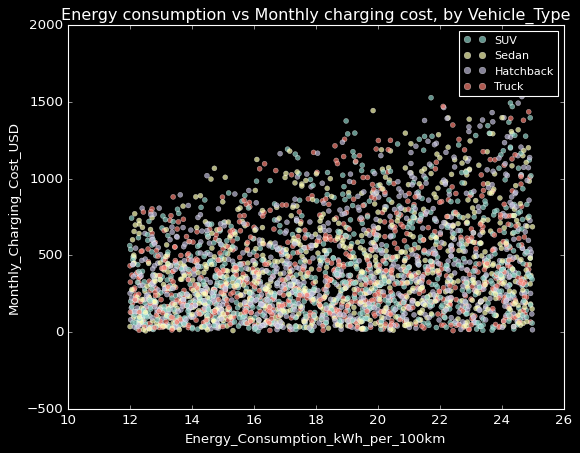

In [226]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('dark_background')

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Energy_Consumption_kWh_per_100km", y="Monthly_Charging_Cost_USD", hue="Vehicle_Type", alpha=0.7)
plt.title("Energy consumption vs Monthly charging cost, by Vehicle_Type")
plt.legend(fontsize = "small")
plt.show()

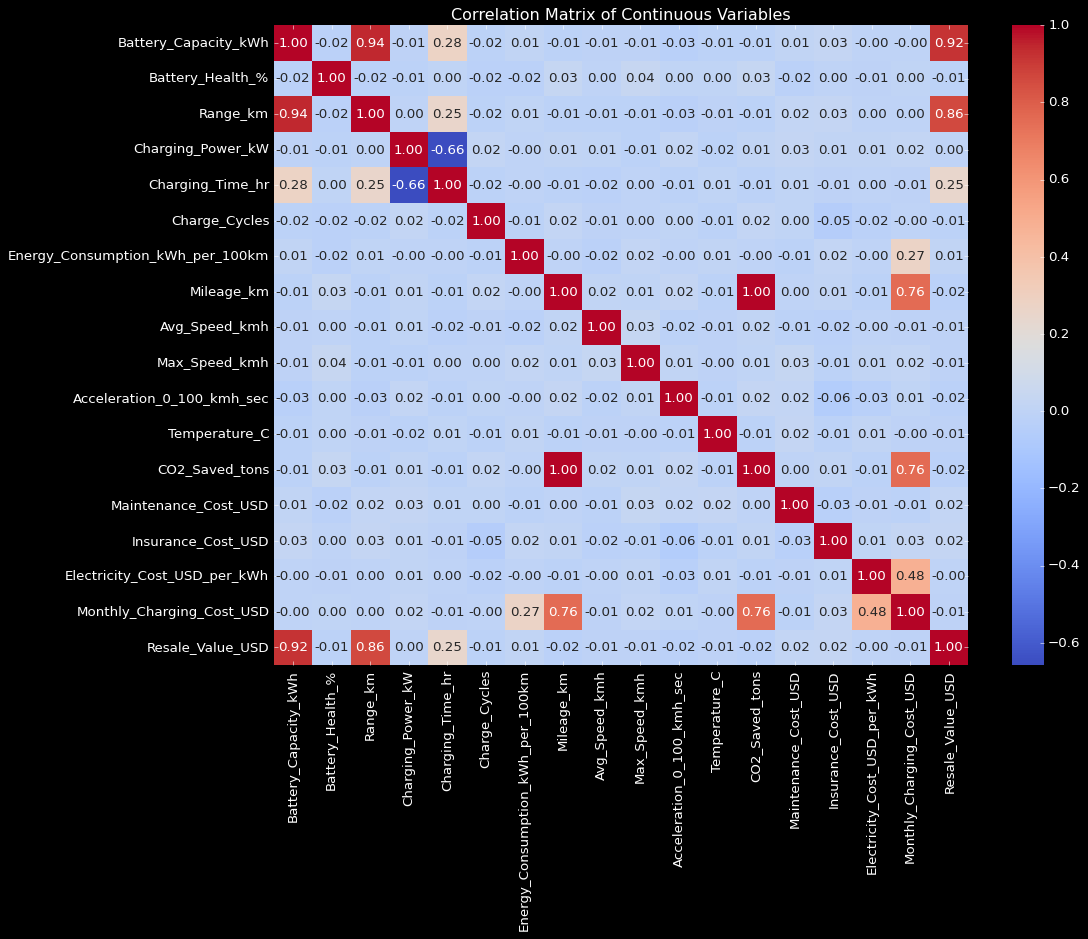

In [214]:
import seaborn as sns

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_cols = num_cols.drop(["Year"], errors='ignore')
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Continuous Variables")
plt.show()

<Figure size 960x400 with 0 Axes>

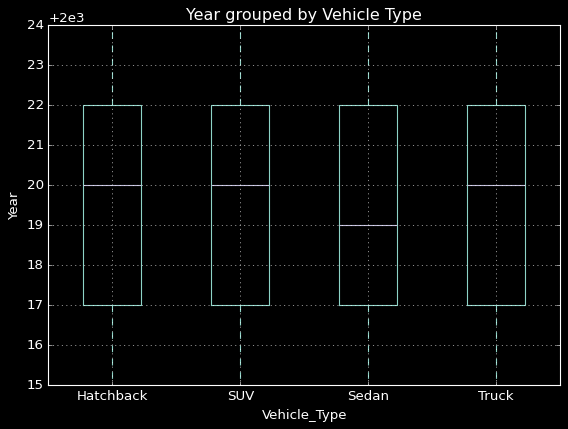

<Figure size 960x400 with 0 Axes>

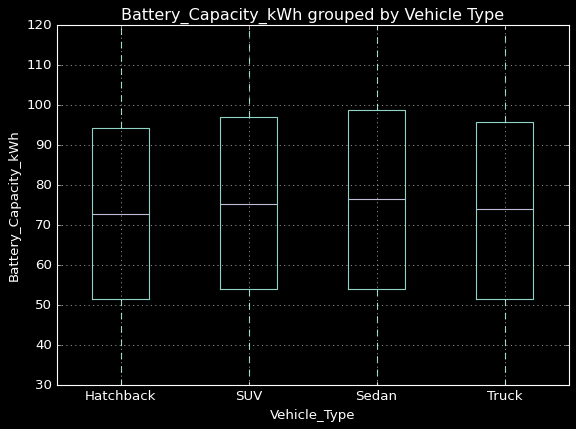

<Figure size 960x400 with 0 Axes>

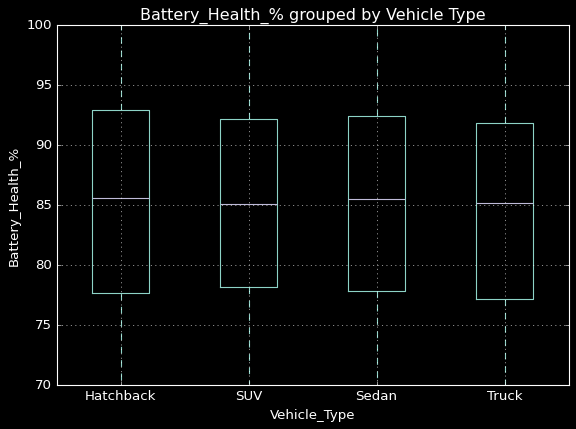

<Figure size 960x400 with 0 Axes>

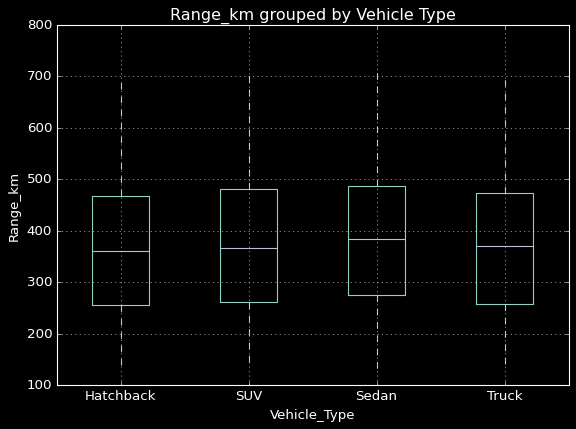

<Figure size 960x400 with 0 Axes>

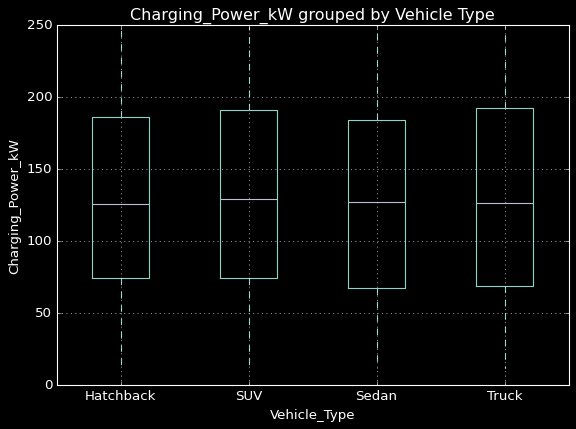

<Figure size 960x400 with 0 Axes>

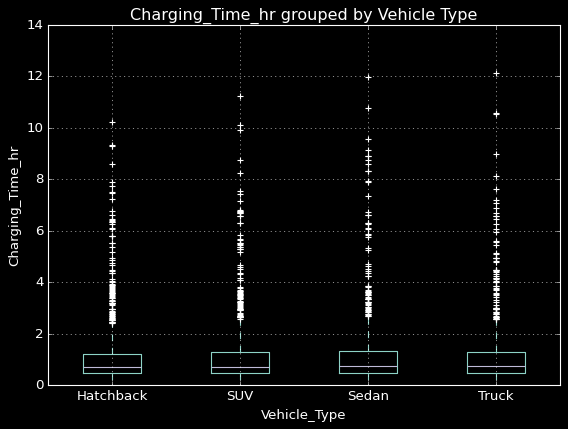

<Figure size 960x400 with 0 Axes>

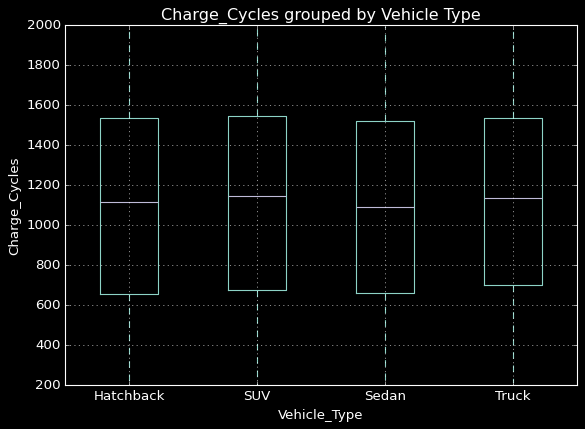

<Figure size 960x400 with 0 Axes>

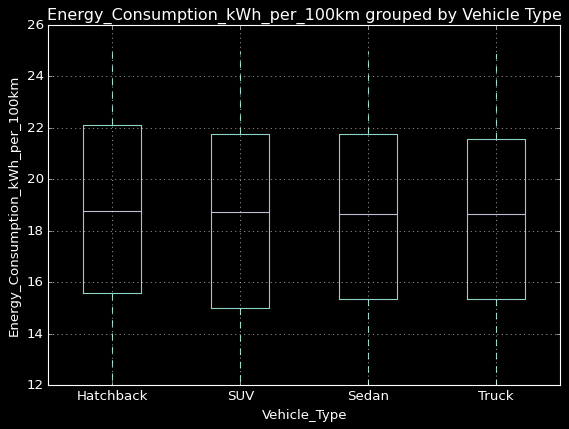

<Figure size 960x400 with 0 Axes>

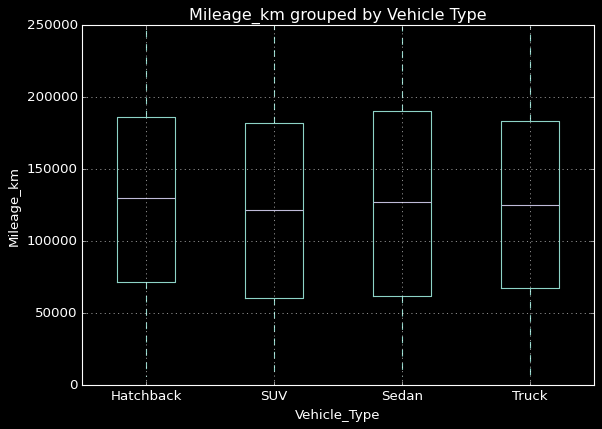

<Figure size 960x400 with 0 Axes>

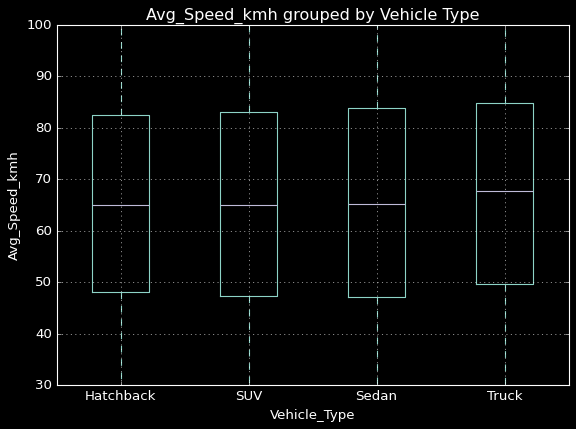

<Figure size 960x400 with 0 Axes>

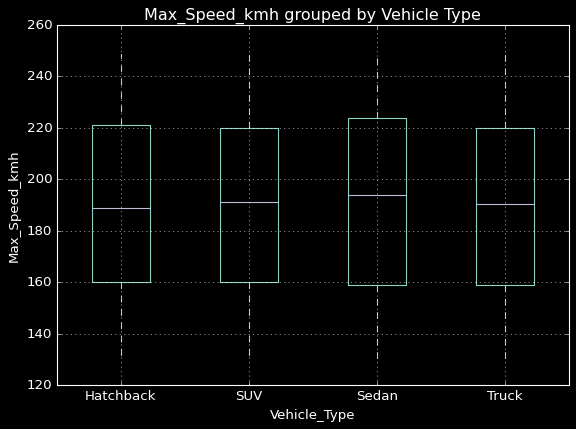

<Figure size 960x400 with 0 Axes>

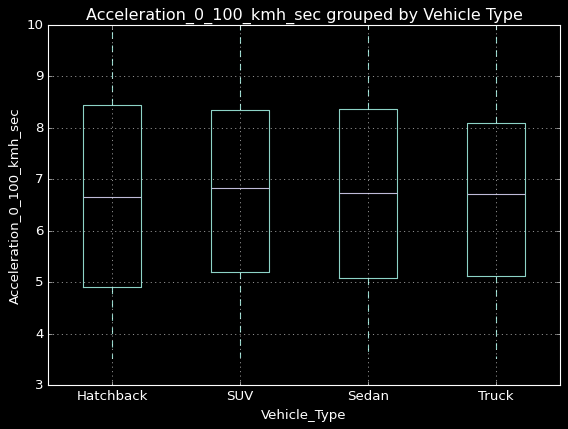

<Figure size 960x400 with 0 Axes>

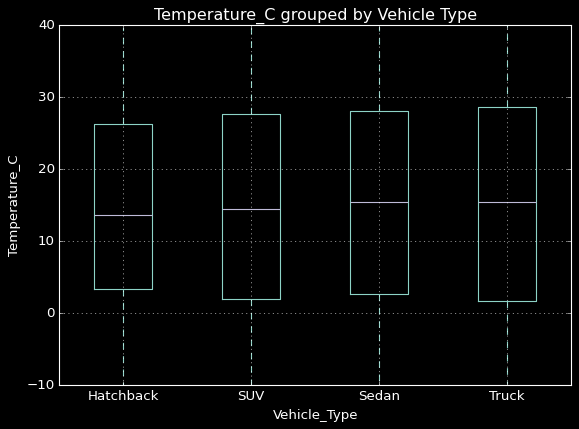

<Figure size 960x400 with 0 Axes>

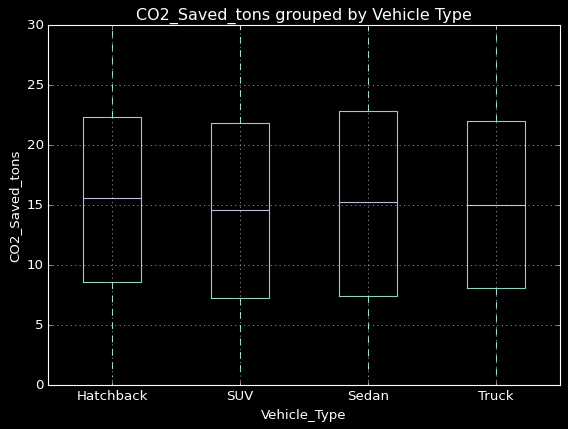

<Figure size 960x400 with 0 Axes>

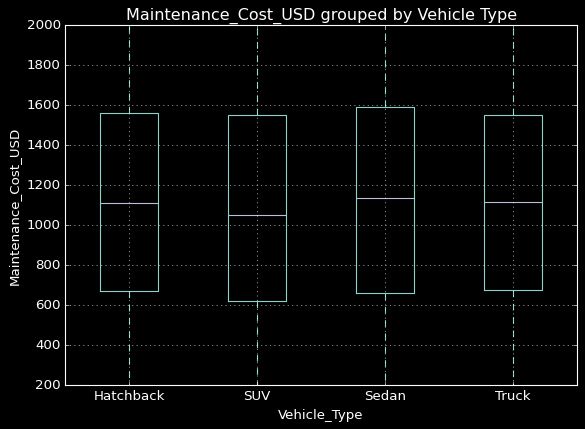

<Figure size 960x400 with 0 Axes>

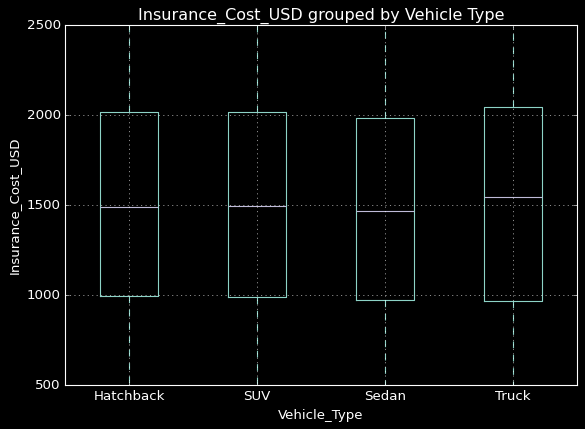

<Figure size 960x400 with 0 Axes>

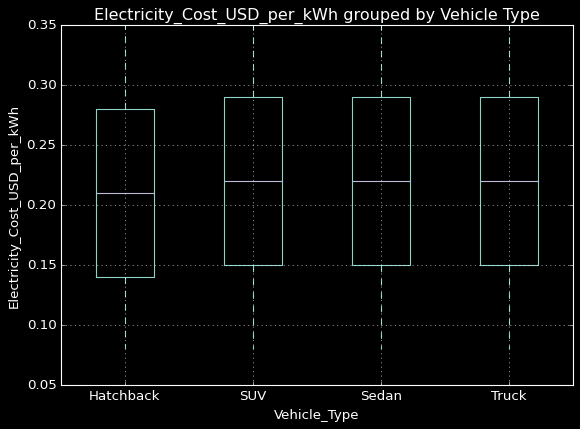

<Figure size 960x400 with 0 Axes>

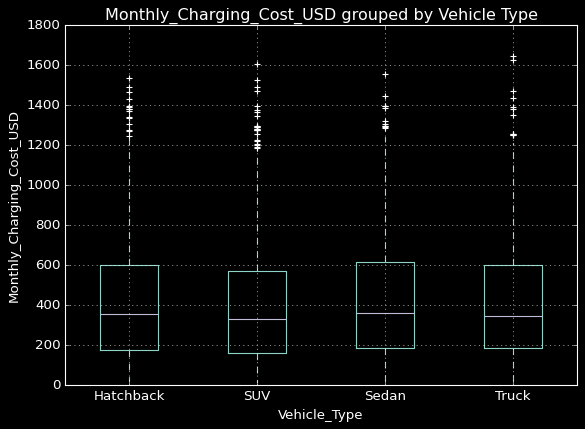

<Figure size 960x400 with 0 Axes>

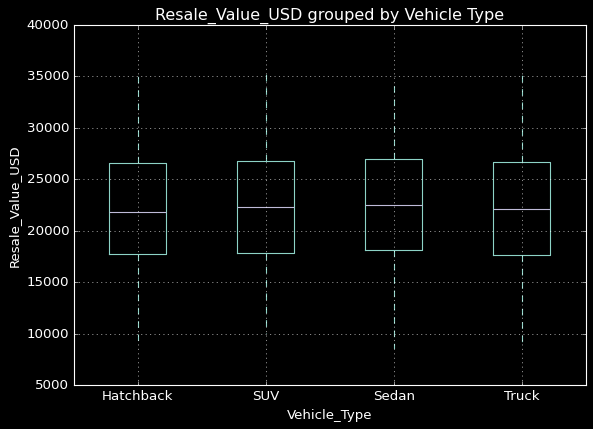

In [215]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for cont_col in num_cols:
    plt.figure(figsize=(12, 5))
    df.boxplot(column=cont_col, by="Vehicle_Type")
    plt.title(f"{cont_col} grouped by Vehicle Type")
    plt.suptitle("")
    plt.xlabel("Vehicle_Type")
    plt.ylabel(cont_col)
    plt.show() 

### 5) Análisis y conclusiones

Por medio del análisis de 3 mil registros en una base de datos compuesta por las características de una serie de vehículos, divididos por marca, modelo, años, región, tipo de vehículo y uso, se encontraron los siguientes elementos:

Comportamiento del mercado:

1) Se nota un ligero predominio de SUV y Sedan; los Hatchback se presentan una opción razonable para el uso urban y los Truck más ligado a casos de uso intensivo. La mezcla por año muestra expansión reciente con mayor densidad de registros en los años más nuevos, consistente con un mercado en adopción acelerada.
2) Para uso comercial se observan kilometrajes y costos de mantenimiento más altos. Por uso personal, perfiles de uso más moderado, y para fleet se reflejan compras estacionadas.
3) En el mercado emergen tendenciaas tranversales:
    - La autonomía está liagada al precio, así configuraciones de batería mayores empujan el precio, pero mejoran la vida últil del vehículo.
    - El mantenimiento sube con el kilometraje y con usos más intensivos. En vehículos más nuevos el mantenimiento unitario tiende a estabilizarse (garantías activas, menor desgaste acumulado).
    - El iempo de carga y la capacidad de batería se mueven juntos, pues la experiencia real depende de potencia de carga disponible. 


Análisis basados en las características del vehículo:

1) Precio: el segmento SUV y Truck son los que tienen el precio más alto en comparación con los demás segmentos, por su equipamiento y el rendimiento de sus componentes. Los Sedan son lo que presentan un mejor balance entre mejor balance costo–prestaciones, y los Hatchback se mantienen en un punto medio. 
2) Costo de mantenimiento:  el costo aumenta conforme aumento el kilometraje. Es mayor para el uso comercial y de tipo Trcuk por su exigencia y uso extensivo. Por el contrario, los Sedan y los Hatchback que, son de uso comercial, presentan un costo de mantenimiento más bajo, sobre todo en comparación los SUV.
3) Autonomía: los Sedan suelen mostrar mejor eficiencia (más km por kWh) por menor masa y aerodinámica, los SUV/Truck sacrifican eficiencia por tamaño y desempeño.

Relaciones entre continuas en clave de segmento y uso:

1) Capacidad de la batería - Rango: positiva, por segmento, Sedan domina en eficiencia.
2) Kilometraje - Costo de mantenimiento: positiva; más uso, más mantenimiento (más clara en comercial y Truck).
3) Tiempo de carga  - Capacidad de la batería: positivam el impacto operativo depende del perfil de carga.

Por uso:

1) Comercial: distribuciones de kilometraje y mantenimiento sesgadas hacia valores altos. Los tiempos de carga condicionan la productividad.
2) Personal: mayor dispersión en precio (variedad de presupuestos) y autonomía.
3) Fleet: de identifica una mayor estacionalización en la compra debido al tipo de uso del vehículo y la adquisición según necesidad.

Análisis por segmento:

1) Sedan: probables ganadores en ese sweet spot entre precio, autonomía y eficiencia.
2) Hatchback: lidera en costo total bajo para uso personal; ideal para ser la primera compra.
3) SUV: ganan si la autonomía y el equipamiento justifican el premium, aunque el costo de mantenimiento es alto.
4) Truck: a la hora de tomar la desición de la comprar es importante hacer un análisis del costo total de la propiedad (mantenimiento + tiempo de carga + autonomía bajo carga), por sus condiciones demandantes.

